In [91]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

Here, We have loaded the dataset: dataset link :https://www.kaggle.com/rsadiq/salary?select=Salary.csv

In [92]:
salary_data = pd.read_csv('datasets/Salary.csv')

salary_data.sample(10)

,YearsExperience,Salary
26,NaN,101302
3,2.0,43525
25,7.1,98273
16,4.2,777896
33,10.5,121872
10,3.2,64445
5,2.9,56642
38,13.5,139465
24,6.8,2980000
8,NaN,54445


In [93]:
salary_data.shape

(39, 2)

The datatype and non-null count can be obtained using 'info' method

In [94]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           39 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 752.0 bytes


Descriptive statistics of the data is obtained

In [95]:
salary_data.describe()

,YearsExperience,Salary
count,33.000000,3.900000e+01
mean,6.281818,2.097425e+05
std,3.714116,4.939482e+05
min,1.100000,3.773100e+04
25%,3.200000,5.713500e+04
50%,4.900000,9.173800e+04
75%,9.500000,1.221315e+05
max,13.500000,2.980000e+06


Skewness check

In [96]:
salary_data.skew()

YearsExperience    0.446866
Salary             5.029426
dtype: float64

Histogram for 'YearsExperience' is shown, the distribution is slightly right skewed

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

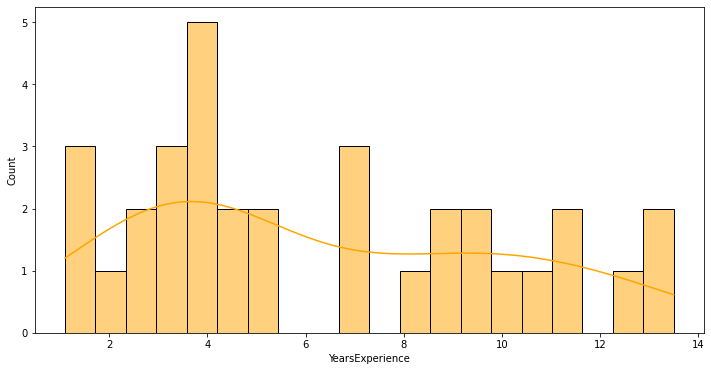

In [97]:
plt.figure(figsize = (12, 6))

sns.histplot(x = salary_data['YearsExperience'], bins = 20, kde = True, color = 'orange')

Salary is right skewed due to the presence of outliers

<AxesSubplot:xlabel='Salary', ylabel='Count'>

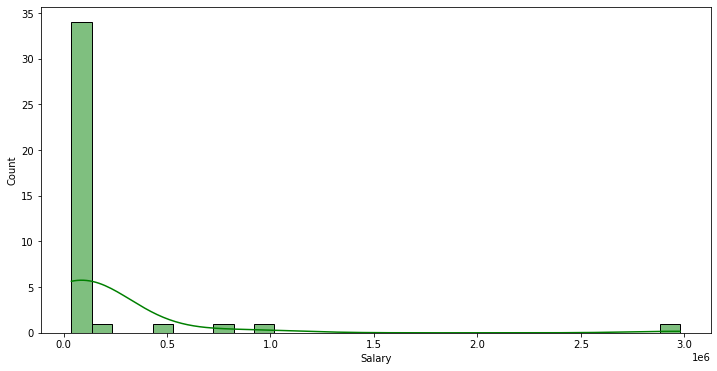

In [98]:
plt.figure(figsize = (12, 6))

sns.histplot(x = salary_data['Salary'], bins = 30, kde = True, color = 'green')

Here We are plotting box plots to check for any outliers. There are no outliers visible in 'Years of experience'.

<AxesSubplot:ylabel='YearsExperience'>

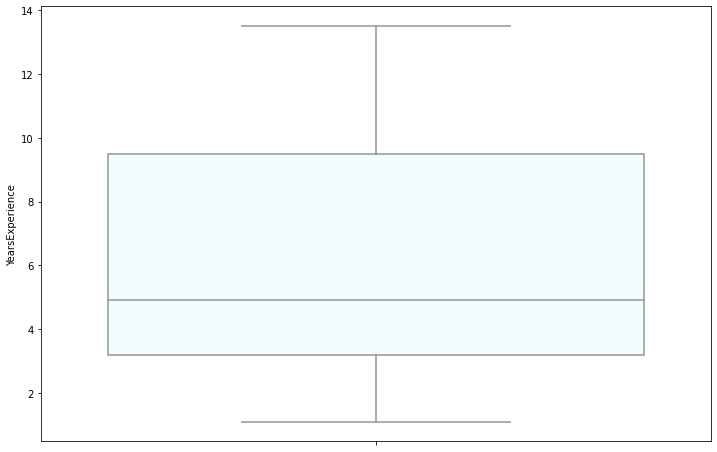

In [99]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = salary_data['YearsExperience'], color = 'azure')

But 'Salary' has some outliers visible towards upper extremes

<AxesSubplot:ylabel='Salary'>

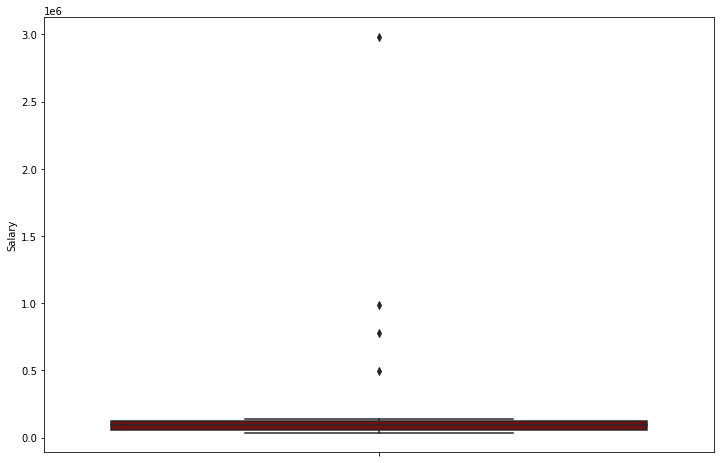

In [100]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = salary_data['Salary'], color = 'maroon')

The 25th(Q1) and 75th(Q3) quartiles are obtained and Inter quartile range(IQR) is obtained from Q3 and Q1

In [101]:
Q1 = salary_data.quantile(0.25, axis = 0)

print('First_Quartile :', Q1)

First_Quartile : YearsExperience        3.2
Salary             57135.0
Name: 0.25, dtype: float64


In [102]:
Q3 = salary_data.quantile(0.75, axis = 0)

print('Third_Quartile :', Q3)

Third_Quartile : YearsExperience         9.5
Salary             122131.5
Name: 0.75, dtype: float64


In [103]:
IQR = Q3 - Q1

print('Inter Quartile Range :', IQR)

Inter Quartile Range : YearsExperience        6.3
Salary             64996.5
dtype: float64


Outliers are detected using IQR method i.e An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.Only the outlier rows( 4nos.) are displayed 

In [104]:
salary_data_outliers = salary_data[((salary_data < (Q1 - 1.5 * IQR)) |\
                                    (salary_data > (Q3 + 1.5 * IQR))).any(axis = 1)]

salary_data_outliers

,YearsExperience,Salary
6,2.9,498365
9,3.1,985600
16,4.2,777896
24,6.8,2980000


The final dataframe is obtained after removing the outlier rows

In [105]:
salary_data = salary_data[~((salary_data < (Q1 - 1.5 * IQR)) |\
                            (salary_data > (Q3 + 1.5 * IQR))).any(axis = 1)]

salary_data.shape

(35, 2)

Now, no outliers are visible for Salary

<AxesSubplot:ylabel='Salary'>

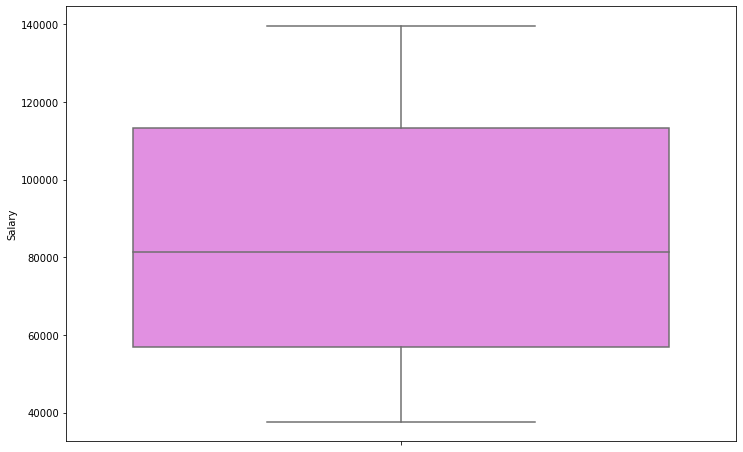

In [106]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = salary_data['Salary'], color = 'violet')

Null values are checked. 6 missing values in YearsExperience can be seen

In [107]:
salary_data.isnull().sum()

YearsExperience    6
Salary             0
dtype: int64

Here We are substituting null values( after removing the outliers as it will effect the null value treatment) with mean using 'fillna' method of pandas

In [108]:
mean_yrs_exp = salary_data['YearsExperience'].mean()

mean_yrs_exp

6.56206896551724

In [109]:
salary_data['YearsExperience'].fillna(value = mean_yrs_exp, inplace = True)

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [110]:
salary_data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.562069,83945.600000
std,3.485214,32162.673003
min,1.100000,37731.000000
25%,3.950000,57019.000000
50%,6.562069,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


We are exploring the relationship between 'YearsExperience'and 'Salary'. High positive correlation can be observed

Text(0, 0.5, 'Salary')

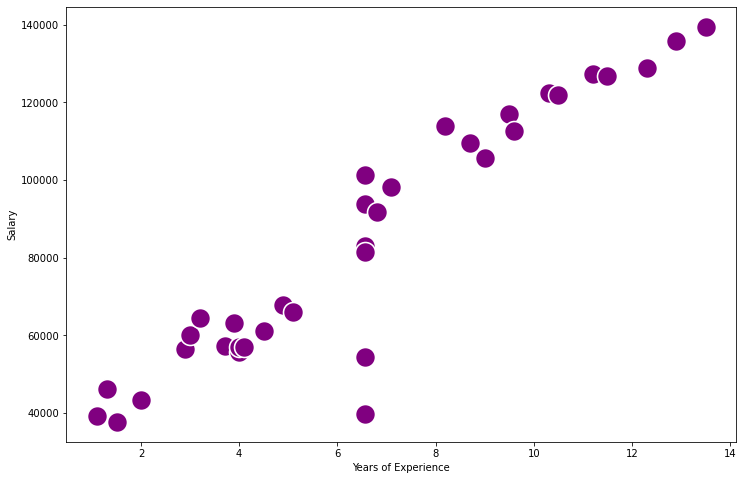

In [111]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'YearsExperience', y = 'Salary', 
                s = 400, color = 'purple',
                data = salary_data)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [112]:
X = salary_data['YearsExperience']

y = salary_data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [113]:
X_train.shape, X_test.shape

((24,), (11,))

In [114]:
y_train.shape, y_test.shape

((24,), (11,))

## Scikit Learn Methods

In [116]:
X_train = X_train.to_numpy()
X_train = X_train.reshape((-1, 1))

y_train = y_train.to_numpy()
y_train = y_train.reshape((-1, 1))

X_train.shape, y_train.shape

((24, 1), (24, 1))

In [117]:
X_test = X_test.to_numpy()
X_test = X_test.reshape((-1, 1))

y_test = y_test.to_numpy()
y_test = y_test.reshape((-1, 1))

X_test.shape, y_test.shape

((11, 1), (11, 1))

Model is defined with the training data

In [118]:
lr = LinearRegression()

linear_reg_model = lr.fit(X_train, y_train)

The model coeficients and intercepts  are obtained using 'coef_' which are same as the parameters obtained using statsmodels method

In [75]:
linear_reg_model.coef_

array([[8480.67000116]])

In [76]:
linear_reg_model.intercept_

array([27144.64698931])

Prediction on test data is done and following metrics are obtained. R2 score is also same as our above method

In [77]:
y_pred = linear_reg_model.predict(X_test)

y_pred[:5]

array([[107711.01200029],
       [ 61915.39399405],
       [100926.47599937],
       [ 87357.40399752],
       [ 68699.92999497]])

In [78]:
print('Training Score:', linear_reg_model.score(X_train, y_train))

Training Score: 0.8714318074107309


In [79]:
print('Testing Score:', linear_reg_model.score(X_test, y_test))

Testing Score: 0.909177248778591


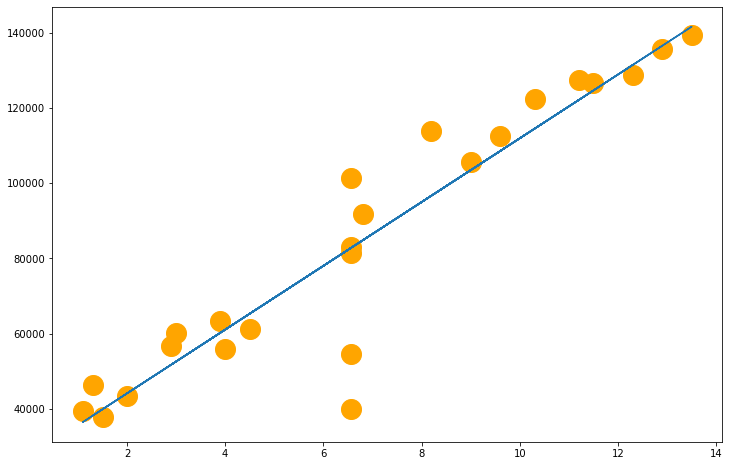

In [89]:
f, ax = plt.subplots(figsize = (12, 8))

plt.plot(X_train, y_train, 'o', markersize = 20, color = 'orange')
plt.plot(X_train , linear_reg_model.coef_ * X_train + linear_reg_model.intercept_)

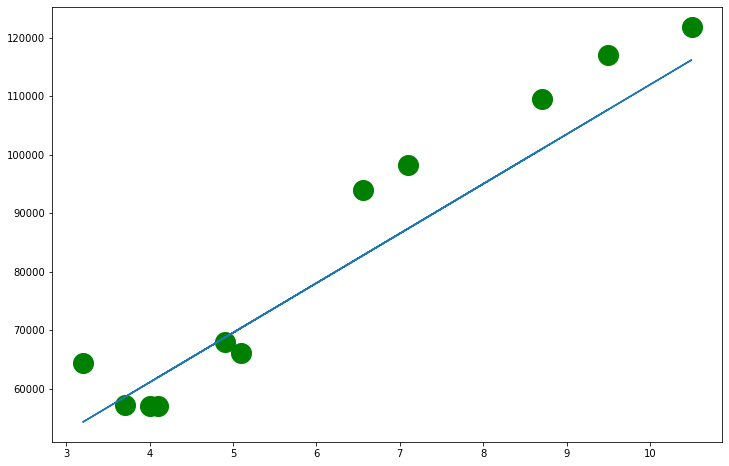

In [90]:
f, ax = plt.subplots(figsize = (12, 8))

plt.plot(X_test, y_test, 'o', markersize = 20, color = 'green')
plt.plot(X_test , linear_reg_model.coef_ * X_test + linear_reg_model.intercept_)